In [5]:
#모듈
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import copy

## 참고사항
- morph2,nouns2는 특수문자만 제거 
- morph3,nouns3는 특수문자 및 불용문자 제거 

In [6]:
#파일 불러오기
df=pd.read_csv('./hotel_v2.csv')


부정: 4929 긍정: 25655


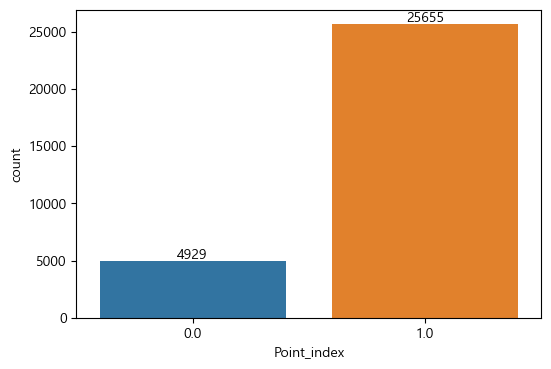

In [85]:
std = 7  #기준값 설정
df["Point_index"] = [1. if point >= std else 0. for point in df["Point"]]


df_pos = df[df['Point_index']==1] #긍정리뷰 데이터프레임
df_neg = df[df['Point_index']==0] #부정리뷰 데이터프레임

#인덱스별 분포 확인
print("부정:",len(df_neg),"긍정:",len(df_pos))
plt.figure(figsize=(6,4))
ax= sns.countplot(x=df['Point_index'])
ax.bar_label(ax.containers[0])

plt.show()

In [86]:
# df_pos.sort_values(by='Point',ascending=False).tail(5)
df_neg.sort_values(by='Point',ascending=False).head(5)

,Grade,Hotel,Country,Year,Month,stay_day,member,Room type,Date,Review Title,Review Contents,Point,Point_index
485,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2020,9,1,유아/아동 동반 가족 여행객,스탠다드 트윈,2020년 9월 | 1박,처음이에요. 메종글래드에서 겪은 이 불쾌함.,"['제주여행 및 출장시, 저녁에 도착하는 일정이 많아서, 거의 대부분 메종글래드를 ...",6.8,0.0
26365,3,라온 호텔 앤 리조트 (Jeju Raon Hotel & Resort),대한민국,2021,3,2,유아/아동 동반 가족 여행객,디럭스 더블 오션뷰,2021년 3월 | 2박,그냥저냥,['주차 때 실갱이 아닌 실갱이로 기분이 쪼금 상함 방안에 불이 너무 어두움'],6.8,0.0
5891,5,씨에스 호텔 앤 리조트 (The Seaes Hotel & Resort),대한민국,2022,3,2,커플/2인 여행객,디럭스 더블룸,2022년 3월 | 2박,제주 느낌 낭낭한 호텔,['신행 중 현지 제주 느낌 내려고 예약했던 호텔이에요. 키를 들고다녀야 하는 아날...,6.8,0.0
26374,3,라온 호텔 앤 리조트 (Jeju Raon Hotel & Resort),대한민국,2022,4,1,커플/2인 여행객,더블룸 - 정원 전망,2022년 4월 | 1박,저렴한 가격에,['말 그대로 입니다 싸고 편하게 머물 수 있어요'],6.8,0.0
5907,5,씨에스 호텔 앤 리조트 (The Seaes Hotel & Resort),대한민국,2018,7,1,유아/아동 동반 가족 여행객,스위트룸,2018년 7월 | 1박,한번은가볼만한곳인거같아요,['22개월아기랑 갔는데 산책말고는 딱히 할게없었어요 키스벤치있는 쪽에 수영장이라도...,6.8,0.0


In [87]:
df['Review Contents'] = df['Review Contents'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

C:\Users\Jeong\AppData\Local\Temp\ipykernel_1416\790505034.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review Contents'] = df['Review Contents'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [88]:
tag = Okt()
df['morphs'] = df['Review Contents'].apply(lambda x : tag.morphs(x))
df['nouns'] = df['Review Contents'].apply(lambda x : tag.nouns(x))
df.head()

,Grade,Hotel,Country,Year,Month,stay_day,member,Room type,Date,Review Title,Review Contents,Point,Point_index,morphs,nouns
0,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2021,5,3,나홀로 여행객,스탠다드 트윈,2021년 5월 | 3박,기대보다 좋았어요,시설이 낡았다는 후기를 보고 별 기대없이 갔는데 박동안 행복하게 보내고 왔습니다 새...,10.0,1.0,"[시설, 이, 낡았다는, 후기, 를, 보고, 별, 기대, 없이, 갔는데, 박동, 안...","[시설, 후기, 보고, 별, 기대, 박동, 안, 새, 느낌, 침대, 햇, 다음, 숙..."
1,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2019,8,1,커플/2인 여행객,객실정보없음,2019년 8월 | 1박,수영장이용!!,첫날 공항이랑 가까워서 이용했구요 수영장이 화면보다 작아요 많이 수영장보고 선택한건...,10.0,1.0,"[첫날, 공항, 이랑, 가까워서, 이용, 했구요, 수영장, 이, 화면, 보다, 작아...","[첫날, 공항, 이용, 수영장, 화면, 수영장, 보고, 선택, 사람, 수기, 베드,..."
2,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2021,4,1,커플/2인 여행객,프리미엄 더블,2021년 4월 | 1박,메종 글래드 너무 좋았어요,메종 글래드는 처음이였는데 제주 여행 마지막날 다른 숙소에서 벌레를 보고나서 바로 ...,10.0,1.0,"[메종, 글, 래, 드는, 처음, 이, 였는데, 제주, 여행, 마지막, 날, 다른,...","[메종, 글, 처음, 제주, 여행, 마지막, 날, 다른, 숙소, 벌레, 바로, 예약..."
3,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2021,3,1,유아/아동 동반 가족 여행객,스탠다드 트윈,2021년 3월 | 1박,5성급 호텔을 저렴한가격에 누릴수있는곳,로비 직원분들 친절하시고 레스토랑과 카페 분위기가 너무 좋았습니다 특히 가격도 호텔...,10.0,1.0,"[로비, 직원, 분들, 친절하시고, 레스토랑, 과, 카페, 분위기, 가, 너무, 좋...","[로비, 직원, 레스토랑, 카페, 분위기, 가격, 호텔, 내, 위치, 더, 일반, ..."
4,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2021,2,2,커플/2인 여행객,스탠다드 트윈,2021년 2월 | 2박,4계절이 다른 도심속호텔,제주를 매달 한번씩은 가고있는데 메종은 거의 계절마다 방문하는거 같습니다 항상 친절...,10.0,1.0,"[제주, 를, 매달, 한번, 씩, 은, 가고있는데, 메, 종은, 거의, 계절, 마다...","[제주, 매달, 한번, 메, 종은, 거의, 계절, 방문, 항상, 직원, 먼저, 인사..."


In [89]:
import string

df['morphs2'] = df['morphs'].apply(lambda x : ' '.join([i for i in x if i not in string.punctuation]))
df['nouns2'] = df['nouns'].apply(lambda x : ' '.join([i for i in x if i not in string.punctuation]))

In [10]:
df.to_csv('./ML_dataset.csv')

# 여기서부터 실행하면 됩니다

부정: 4929 긍정: 25655


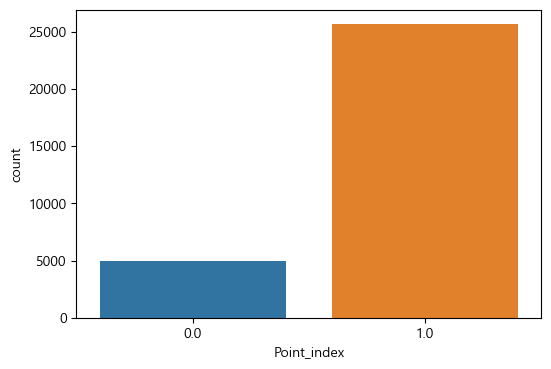

In [90]:
# 평점 변환시 사용하기

std = 7  #기준값 설정
df["Point_index"] = [1. if point >= std else 0. for point in df["Point"]]


df_pos = df[df['Point_index']==1] #긍정리뷰 데이터프레임
df_neg = df[df['Point_index']==0] #부정리뷰 데이터프레임

#인덱스별 분포 확인
print("부정:",len(df_neg),"긍정:",len(df_pos))
plt.figure(figsize=(6,4))
sns.countplot(x=df['Point_index'])
plt.show()

In [102]:
# 불용어 (https://www.ranks.nl/stopwords/korean) 불용어 리셋시 사용

korean_stopword='./stopwords.txt'

with open(korean_stopword, encoding='utf-8') as f:
    stopwords=f.readlines()

stoplist=[x.strip() for x in stopwords]


In [101]:
#특수문자 및 불용문자 제거, 워드클라우드에서 추가후 여기서부터 실행

import string
string.punctuation

#형태소
df['morphs3'] = df['morphs'].apply(lambda x : ' '.join([i for i in x if i not in stoplist]))
df['morphs3'] = df['morphs3'].apply(lambda x : ''.join([i for i in x if i not in string.punctuation]))

#명사
df['nouns3'] = df['nouns'].apply(lambda x : ' '.join([i for i in x if i not in stoplist]))
df['nouns3'] = df['nouns3'].apply(lambda x : ''.join([i for i in x if i not in string.punctuation]))

#9점이상 6점미만 데이터만 분류(학습용)
df2=copy.deepcopy(df)
df2=df2[(df2['Point']>=9)|(df2['Point']<6)]

In [99]:

print(np.shape(X1))
print(np.shape(X3))

(30584, 38827)
(19120,)


In [1]:
df3 =df[df['Point']<9 & (df['Point']>=9)]

SyntaxError: invalid syntax (2261234390.py, line 1)

In [107]:
# 벡터화 

from sklearn.feature_extraction.text import CountVectorizer

#불용문자 추가시 2를 3으로 변경    
X1 = df['morphs3']
X2 = df['nouns3']
y = df['Point_index']

vectorizer = CountVectorizer(lowercase=False)


# Train data와 test data로 나누기

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y, test_size = 0.2, random_state=13)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y, test_size = 0.2, random_state=13)

X1 = vectorizer.fit_transform(X1)
X2 = vectorizer.fit_transform(X2)


#평점 9점이상 6점미만 데이터만 사용
from sklearn.feature_extraction.text import CountVectorizer

#불용문자 추가시 2를 3으로 변경    
X3 = df2['morphs3']
X4 = df2['nouns3']
y2 = df2['Point_index']





In [ ]:
# Train data와 test data로 나누기

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y2, test_size = 0.2, random_state=13)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y2, test_size = 0.2, random_state=13)

vectorizer2 = CountVectorizer(lowercase=False.)fit(X1)
X3_train = vectorizer2.fit_transform(X3)
X3_test = vectorizer2.fit_transform(X3)
X4_train = vectorizer2.fit_transform(X4)
X4_test = vectorizer2.fit_transform(X4)

In [105]:
#평점 9점이상 6점미만 데이터만 사용
from sklearn.feature_extraction.text import CountVectorizer

#불용문자 추가시 2를 3으로 변경    
X3 = df2['morphs3']
X4 = df2['nouns3']
y2 = df2['Point_index']
X1 = df['morphs3']



# Train data와 test data로 나누기

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y2, test_size = 0.2, random_state=13)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y2, test_size = 0.2, random_state=13)

vectorizer2 = CountVectorizer(min_df=5,lowercase=False)
vectorizer2.fit(X3)
X3_train = vectorizer2.transform(X3_train)
X3_test = vectorizer2.transform(X3_test)
X4_train = vectorizer2.transform(X4_train)
X4_test = vectorizer2.transform(X4_test)
X1 = vectorizer2.transform(X1)
# np.shape(X1),np.shape(X3_train)
model3 = MultinomialNB()
#형태소 기준
model3.fit(X3_train, y3_train)
# #형태소 기준
pred_all = model3.predict(X1)

### 머신러닝(나이브 베이즈, 로지스틱 회귀)

In [96]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model_n = MultinomialNB()
#형태소 기준
model.fit(X1_train, y1_train)
pred = model.predict(X1_test)
#명사 기준
model_n.fit(X2_train, y2_train)
pred_n = model_n.predict(X2_test)



from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2_n = LogisticRegression()

model2.fit(X1_train,y1_train)
y_pred_test = model2.predict(X1_test)
model2_n.fit(X2_train,y2_train)
y_pred_test_n = model2_n.predict(X2_test)


#평점 9점이상 6점미만 데이터만 사용
from sklearn.naive_bayes import MultinomialNB

model3 = MultinomialNB()
model3_n = MultinomialNB()
#형태소 기준
model3.fit(X3_train, y3_train)
pred3 = model3.predict(X3_test)
#명사 기준
model3_n.fit(X4_train, y4_train)
pred3_n = model3_n.predict(X4_test)

from sklearn.linear_model import LogisticRegression

model4 = LogisticRegression()
model4_n = LogisticRegression()

model4.fit(X3_train,y3_train)
y_pred_test4 = model4.predict(X3_test)
model4_n.fit(X4_train,y4_train)
y_pred_test4_n = model4_n.predict(X4_test)

ValueError: could not convert string to float: '역시 소문 대로 였습니다 위치 도 좋고 호텔 도 깨끗하고 조식 도 맛있고 웰컴 드 링크 빵 할인 쿠폰 기대 입니다 온다면 꼭 다시 오고 싶습니다'

# 성능 테스트

In [97]:
# 분류기 성능 return 

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.metrics import confusion_matrix
from sklearn import metrics


def get_clf_eval(y_test,pred):
    acc= accuracy_score(y_test, pred)
    pre=precision_score(y_test, pred)
    re=recall_score(y_test, pred)
    f1=f1_score(y_test, pred)
    auc=roc_auc_score(y_test, pred)

    return acc, pre, re,f1, auc


def print_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test,pred)
    acc,pre,re,f1,auc = get_clf_eval(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('===============')

    print('Accuracy : {0:.4f}, Precision : {1:.4f}'.format(acc,pre))
    print('Recall : {0:.4f}, F1 : {1:.4f}, Auc:{2:.4f}'.format(re,f1,auc))

print("전체 리뷰")
#나이브베이즈 성능
print("형태소 기준")
print_clf_eval(y1_test, pred)

#로지스틱 성능
print_clf_eval(y2_test, y_pred_test)


print("\n","============="*20)
#나이브베이즈 성능
print("명사 기준")
print_clf_eval(y1_test, pred_n)

#로지스틱 성능
print_clf_eval(y2_test, y_pred_test_n)

전체 리뷰
형태소 기준


NameError: name 'pred' is not defined

In [94]:

print("일부 평점 리뷰 추출")
#나이브베이즈 성능
print("형태소 기준")
print_clf_eval(y3_test, pred3)

#로지스틱 성능
print_clf_eval(y4_test, y_pred_test4)


print("\n","============="*20)
#나이브베이즈 성능
print("명사 기준")
print_clf_eval(y3_test, pred3_n)

#로지스틱 성능
print_clf_eval(y4_test, y_pred_test4_n)

일부 평점 리뷰 추출
형태소 기준


NameError: name 'print_clf_eval' is not defined

# 오버샘플링 SMOTE

In [68]:
# 오버샘플링 모듈 설치
# !pip install imblearn

In [95]:
from imblearn.over_sampling import SMOTE

smote1 = SMOTE(random_state=42)
smote2 = SMOTE(random_state=42)


over_x,over_y = smote1.fit_resample(X1,y)
over_x2,over_y2 = smote2.fit_resample(X2,y)


#기본 형태소
X1_over_train, X1_over_test, y1_over_train, y1_over_test = train_test_split(over_x,over_y, test_size = 0.2, random_state=13)
#기본 명사
X2_over_train, X2_over_test, y2_over_train, y2_over_test = train_test_split(over_x2,over_y2, test_size = 0.2, random_state=13)


#나이브베이즈
model = MultinomialNB()
model_n = MultinomialNB()
#형태소 기준
model.fit(X1_over_train, y1_over_train)
pred = model.predict(X1_over_test)
#명사 기준
model_n.fit(X2_over_train, y2_over_train)
pred_n = model_n.predict(X2_over_test)

#로지스틱
model2 = LogisticRegression()
model2_n = LogisticRegression()

model2.fit(X1_over_train,y1_over_train)
y_pred_test = model2.predict(X1_over_test)
model2_n.fit(X2_over_train,y2_over_train)
y_pred_test_n = model2_n.predict(X2_over_test)

print("전체 리뷰")
#나이브베이즈 성능
print("형태소 기준")
print_clf_eval(y1_over_test, pred)

#로지스틱 성능
print_clf_eval(y2_over_test, y_pred_test)


print("\n","============="*20)
#나이브베이즈 성능
print("명사 기준")
print_clf_eval(y1_over_test, pred_n)

#로지스틱 성능
print_clf_eval(y2_over_test, y_pred_test_n)




c:\Users\Jeong\miniconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


전체 리뷰
형태소 기준
=> confusion matrix
[[2176 1581]
 [ 605 3162]]
Accuracy : 0.7095, Precision : 0.6667
Recall : 0.8394, F1 : 0.7431, Auc:0.7093
=> confusion matrix
[[2927  830]
 [1144 2623]]
Accuracy : 0.7376, Precision : 0.7596
Recall : 0.6963, F1 : 0.7266, Auc:0.7377

명사 기준
=> confusion matrix
[[2281 1476]
 [1138 2629]]
Accuracy : 0.6526, Precision : 0.6404
Recall : 0.6979, F1 : 0.6679, Auc:0.6525
=> confusion matrix
[[2839  918]
 [1515 2252]]
Accuracy : 0.6766, Precision : 0.7104
Recall : 0.5978, F1 : 0.6493, Auc:0.6767


c:\Users\Jeong\miniconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
#평점 9점이상 6점미만 데이터만 사용
smote3 = SMOTE(random_state=42)
smote4 = SMOTE(random_state=42)
over_x3,over_y3 = smote3.fit_resample(X3,y2)
over_x4,over_y4 = smote4.fit_resample(X4,y2)
# 6미만,9이상 형태소
X3_over_train, X3_over_test, y3_over_train, y3_over_test = train_test_split(over_x3,over_y3, test_size = 0.2, random_state=13)
#6미만,9이상 명사
X4_over_train, X4_over_test, y4_over_train, y4_over_test = train_test_split(over_x4,over_y4, test_size = 0.2, random_state=13)

from sklearn.naive_bayes import MultinomialNB

model3 = MultinomialNB()
model3_n = MultinomialNB()
#형태소 기준
model3.fit(X3_over_train, y3_over_train)
pred3 = model3.predict(X3_over_test)
#명사 기준
model3_n.fit(X4_over_train, y4_over_train)
pred3_n = model3_n.predict(X4_over_test)

from sklearn.linear_model import LogisticRegression

model4 = LogisticRegression()
model4_n = LogisticRegression()

model4.fit(X3_over_train,y3_over_train)
y_pred_test4 = model4.predict(X3_over_test)
model4_n.fit(X4_over_train,y4_over_train)
y_pred_test4_n = model4_n.predict(X4_over_test)


print("일부 평점 리뷰 추출")
#나이브베이즈 성능
print("형태소 기준")
print_clf_eval(y3_over_test, pred3)

#로지스틱 성능
print_clf_eval(y3_over_test, y_pred_test4)


print("\n","============="*20)
#나이브베이즈 성능
print("명사 기준")
print_clf_eval(y3_over_test, pred3_n)

#로지스틱 성능
print_clf_eval(y3_over_test, y_pred_test4_n)

일부 평점 리뷰 추출
형태소 기준
=> confusion matrix
[[2884  395]
 [ 265 3077]]
Accuracy : 0.9003, Precision : 0.8862
Recall : 0.9207, F1 : 0.9031, Auc:0.9001
=> confusion matrix
[[3075  204]
 [ 407 2935]]
Accuracy : 0.9077, Precision : 0.9350
Recall : 0.8782, F1 : 0.9057, Auc:0.9080

명사 기준
=> confusion matrix
[[2737  542]
 [ 695 2647]]
Accuracy : 0.8132, Precision : 0.8300
Recall : 0.7920, F1 : 0.8106, Auc:0.8134
=> confusion matrix
[[3003  276]
 [ 828 2514]]
Accuracy : 0.8333, Precision : 0.9011
Recall : 0.7522, F1 : 0.8200, Auc:0.8340


c:\Users\Jeong\miniconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_over = MultinomialNB()
# model_n = MultinomialNB()
#형태소 기준
model_over.fit(X_over_train, y_over_train)
pred_over = model_over.predict(X_over_test)
#명사 기준
# model_n.fit(X2_train, y2_train)
# pred_n = model_n.predict(X2_test)

#나이브베이즈 성능
print("형태소 기준")
print_clf_eval(y_over_test, pred_over)

#로지스틱 성능
# print_clf_eval(y4_test, y_pred_test4)

In [110]:
np.shape(X3), np.shape(X1)

((19120, 29044), (30584, 38804))

In [102]:
#형태소 기준
model3.fit(X3, y2)
pred3_all = model3.predict(X1)

ValueError: X has 38804 features, but MultinomialNB is expecting 29044 features as input.

In [132]:
X1 = df['morphs3']

vectorizer2 = CountVectorizer(lowercase=False).fit(X3)
X1 = vectorizer2.fit_transform(X1)
X3_train = vectorizer2.fit_transform(X3_train)
X3_test = vectorizer2.fit_transform(X3_test)

TypeError: expected string or bytes-like object

In [126]:
# #평점 나눈거 기준으로 전체 예측하기(현재 에러나옴)


X1 = df['morphs3']

vectorizer2 = CountVectorizer(lowercase=False).fit(X3_train)
X1 = vectorizer2.fit_transform(X1)
X3_train = vectorizer2.fit_transform(X3_train)
X3_test = vectorizer2.fit_transform(X3_test)
# X4_train = vectorizer2.fit_transform(X4)
# X4_test = vectorizer2.fit_transform(X4)
model3 = MultinomialNB()
model3_n = MultinomialNB()
#형태소 기준
model3.fit(X3_train, y3_train)
# #형태소 기준
pred_all = model3.predict(X1)
# #명사 기준
# pred_all_n = model3_n.predict(X2_test)

# #형태소 기준
# y_pred_test_all = model4.predict(X1_test)
# y_pred_test_all_n = model4_n.predict(X2_test)

# #나이브베이즈 성능
# print("형태소 기준")
# print_clf_eval(y1_test, pred_all)

# #로지스틱 성능
# print_clf_eval(y2_test, y_pred_test_all)


# print("\n","============="*20)
# #나이브베이즈 성능
# print("명사 기준")
# print_clf_eval(y1_test, pred_all_n)

# #로지스틱 성능
# print_clf_eval(y2_test, y_pred_test_all_n)

TypeError: expected string or bytes-like object

# 워드클라우드 확인용 

In [58]:
df.head()

,Grade,Hotel,Country,Year,Month,stay_day,member,Room type,Date,Review Title,Review Contents,Point,Point_index,morphs,nouns,morphs2,nouns2
0,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2021,5,3,나홀로 여행객,스탠다드 트윈,2021년 5월 | 3박,기대보다 좋았어요,시설이 낡았다는 후기를 보고 별 기대없이 갔는데 박동안 행복하게 보내고 왔습니다 새...,10.0,1.0,"[시설, 이, 낡았다는, 후기, 를, 보고, 별, 기대, 없이, 갔는데, 박동, 안...","[시설, 후기, 보고, 별, 기대, 박동, 안, 새, 느낌, 침대, 햇, 다음, 숙...",시설 이 낡았다는 후기 를 보고 별 기대 없이 갔는데 박동 안 행복하게 보내고 왔습...,시설 후기 보고 별 기대 박동 안 새 느낌 침대 햇 다음 숙소 부영 호텔 그랜드 조...
1,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2019,8,1,커플/2인 여행객,객실정보없음,2019년 8월 | 1박,수영장이용!!,첫날 공항이랑 가까워서 이용했구요 수영장이 화면보다 작아요 많이 수영장보고 선택한건...,10.0,1.0,"[첫날, 공항, 이랑, 가까워서, 이용, 했구요, 수영장, 이, 화면, 보다, 작아...","[첫날, 공항, 이용, 수영장, 화면, 수영장, 보고, 선택, 사람, 수기, 베드,...",첫날 공항 이랑 가까워서 이용 했구요 수영장 이 화면 보다 작아요 많이 수영장 보고...,첫날 공항 이용 수영장 화면 수영장 보고 선택 사람 수기 베드 키즈 풀 아이 베드 ...
2,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2021,4,1,커플/2인 여행객,프리미엄 더블,2021년 4월 | 1박,메종 글래드 너무 좋았어요,메종 글래드는 처음이였는데 제주 여행 마지막날 다른 숙소에서 벌레를 보고나서 바로 ...,10.0,1.0,"[메종, 글, 래, 드는, 처음, 이, 였는데, 제주, 여행, 마지막, 날, 다른,...","[메종, 글, 처음, 제주, 여행, 마지막, 날, 다른, 숙소, 벌레, 바로, 예약...",메종 글 래 드는 처음 이 였는데 제주 여행 마지막 날 다른 숙소 에서 벌레 를 보...,메종 글 처음 제주 여행 마지막 날 다른 숙소 벌레 바로 예약 만족 다음 제주 무조...
3,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2021,3,1,유아/아동 동반 가족 여행객,스탠다드 트윈,2021년 3월 | 1박,5성급 호텔을 저렴한가격에 누릴수있는곳,로비 직원분들 친절하시고 레스토랑과 카페 분위기가 너무 좋았습니다 특히 가격도 호텔...,10.0,1.0,"[로비, 직원, 분들, 친절하시고, 레스토랑, 과, 카페, 분위기, 가, 너무, 좋...","[로비, 직원, 레스토랑, 카페, 분위기, 가격, 호텔, 내, 위치, 더, 일반, ...",로비 직원 분들 친절하시고 레스토랑 과 카페 분위기 가 너무 좋았습니다 특히 가격 ...,로비 직원 레스토랑 카페 분위기 가격 호텔 내 위치 더 일반 가격 거기 투숙 객 퍼...
4,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2021,2,2,커플/2인 여행객,스탠다드 트윈,2021년 2월 | 2박,4계절이 다른 도심속호텔,제주를 매달 한번씩은 가고있는데 메종은 거의 계절마다 방문하는거 같습니다 항상 친절...,10.0,1.0,"[제주, 를, 매달, 한번, 씩, 은, 가고있는데, 메, 종은, 거의, 계절, 마다...","[제주, 매달, 한번, 메, 종은, 거의, 계절, 방문, 항상, 직원, 먼저, 인사...",제주 를 매달 한번 씩 은 가고있는데 메 종은 거의 계절 마다 방문 하는거 같습니다...,제주 매달 한번 메 종은 거의 계절 방문 항상 직원 먼저 인사 메이드 객실 감 리 ...


In [59]:
review_corpus=''.join(df['Review Contents'].tolist())
review_corpus_pos=''.join(df[df['Point_index']==1]['Review Contents'].tolist())
review_corpus_neg=''.join(df[df['Point_index']==0]['Review Contents'].tolist())

In [60]:
#한번 실행 stoplist 추가시 아래 별도 코드있음
tagger=Okt()
morphs=tagger.morphs(review_corpus)
count_review=Counter(morphs)
remove_morphs_counter = Counter({x : count_review[x] for x in count_review if len(x) > 1})
morphs_final = Counter({x : remove_morphs_counter[x]for x in remove_morphs_counter if x not in stopwords})  #형태소 기준 키워드 카운팅


nouns=tagger.nouns(review_corpus)
count_review=Counter(nouns)
remove_nouns_counter = Counter({x : count_review[x] for x in count_review if len(x) > 1})
nouns_final = Counter({x : remove_nouns_counter[x]for x in remove_nouns_counter if x not in stopwords})  #명사 기준 키워드 카운팅

In [61]:
#한번 실행 stoplist 추가시 아래 별도 코드있음 평점 변경시 재실행

#긍정 리뷰
morphs_pos=tagger.morphs(review_corpus_pos)
count_morphs_pos=Counter(morphs_pos)
remove_morphs_counter_pos = Counter({x : count_morphs_pos[x] for x in count_morphs_pos if len(x) > 1})
morphs_final_pos = Counter({x : remove_morphs_counter_pos[x]for x in remove_morphs_counter_pos if x not in stopwords})  #형태소 기준 긍정 키워드 카운팅

nouns_pos=tagger.nouns(review_corpus_pos)
count_nouns_pos=Counter(nouns_pos)
remove_nouns_counter_pos = Counter({x : count_nouns_pos[x] for x in count_nouns_pos if len(x) > 1})
nouns_final_pos = Counter({x : remove_nouns_counter_pos[x]for x in remove_nouns_counter_pos if x not in stopwords})  #명사 기준 긍정 키워드 카운팅


#부정 리뷰
morphs_neg=tagger.morphs(review_corpus_neg)
count_morphs_neg=Counter(morphs_neg)
remove_morphs_counter_neg = Counter({x : count_morphs_neg[x] for x in count_morphs_neg if len(x) > 1})
morphs_final_neg = Counter({x : remove_morphs_counter_neg[x]for x in remove_morphs_counter_neg if x not in stopwords})  #형태소 기준 부정 키워드 카운팅

nouns_neg=tagger.nouns(review_corpus_neg)
count_nouns_neg=Counter(nouns_neg)
remove_nouns_counter_neg = Counter({x : count_nouns_neg[x] for x in count_nouns_neg if len(x) > 1})
nouns_final_neg = Counter({x : remove_nouns_counter_neg[x]for x in remove_nouns_counter_neg if x not in stopwords})  #명사 기준 부정 키워드 카운팅





In [62]:
# 불용어 (https://www.ranks.nl/stopwords/korean)

korean_stopword='./stopwords.txt'

with open(korean_stopword, encoding='utf-8') as f:
    stopwords=f.readlines()

stoplist=[x.strip() for x in stopwords]



#불용어 추가
# add_list=['제주도','호텔','숙소','가성','성비','대비','이용','제주','역시','생각','상태','다만','바로','느낌','신라','직원','가격','위치','시설','조식','객실','그냥']

# for word in add_list:
#     stoplist.append(word)

# print(stoplist[-10:])

In [68]:
# 불용어 추가시 코드 실행
add_list=['제주도','호텔','숙소','직원','가격','이용','시설','조식','객실','여행','대비','공항','제주','위치','정말','생각','예약','상태','수영장','입니다','하고','너무']

for word in add_list:
    stoplist.append(word)



morphs_final = Counter({x : remove_morphs_counter[x]for x in remove_morphs_counter if x not in stoplist})
nouns_final = Counter({x : remove_nouns_counter[x]for x in remove_nouns_counter if x not in stoplist})

morphs_final_pos = Counter({x : remove_morphs_counter_pos[x]for x in remove_morphs_counter_pos if x not in stoplist})
nouns_final_pos = Counter({x : remove_nouns_counter_pos[x]for x in remove_nouns_counter_pos if x not in stoplist})

morphs_final_neg = Counter({x : remove_morphs_counter_neg[x]for x in remove_morphs_counter_neg if x not in stoplist})
nouns_final_neg = Counter({x : remove_nouns_counter_neg[x]for x in remove_nouns_counter_neg if x not in stoplist})

In [69]:
#문자 수 확인용 필요한내용 주석 해제 사용

print(morphs_final.most_common(20))
print(morphs_final_pos.most_common(20))
print(morphs_final_neg.most_common(20))
# print(nouns_final.most_common(20))
# print(nouns_final_pos.most_common(20))
# print(nouns_final_neg.most_common(20))

[('좋았어요', 2990), ('좋았습니다', 2976), ('좋아요', 2669), ('좋은', 2620), ('좋고', 2497), ('있어서', 2454), ('분들', 2368), ('깨끗하고', 2194), ('했는데', 2052), ('이라', 2033), ('최고', 2006), ('합니다', 1858), ('주변', 1856), ('있는', 1794), ('서비스', 1771), ('방문', 1756), ('가성', 1755), ('추천', 1726), ('보다', 1705), ('해서', 1699)]
[('좋았어요', 2863), ('좋았습니다', 2822), ('좋아요', 2460), ('좋고', 2368), ('좋은', 2294), ('있어서', 2195), ('분들', 2160), ('깨끗하고', 2112), ('최고', 1941), ('이라', 1612), ('주변', 1603), ('했는데', 1580), ('좋습니다', 1565), ('가성', 1562), ('방문', 1533), ('합니다', 1521), ('서비스', 1481), ('있는', 1472), ('바다', 1460), ('추천', 1453)]
[('냄새', 593), ('화장실', 561), ('청소', 557), ('그냥', 505), ('했는데', 472), ('별로', 444), ('소리', 437), ('이라', 421), ('침대', 417), ('정도', 413), ('체크', 401), ('하는', 397), ('해서', 382), ('느낌', 369), ('많이', 335), ('합니다', 329), ('좋은', 326), ('있는', 322), ('에는', 320), ('모텔', 291)]


In [70]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC !!!")
    rc("font", family="AppleGothic")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows !!!")
    rc("font", family=font_name)
else:
    print("Unknown system... sorry~~~~")

plt.rcParams["axes.unicode_minus"] = False

Hangul OK in your Windows !!!


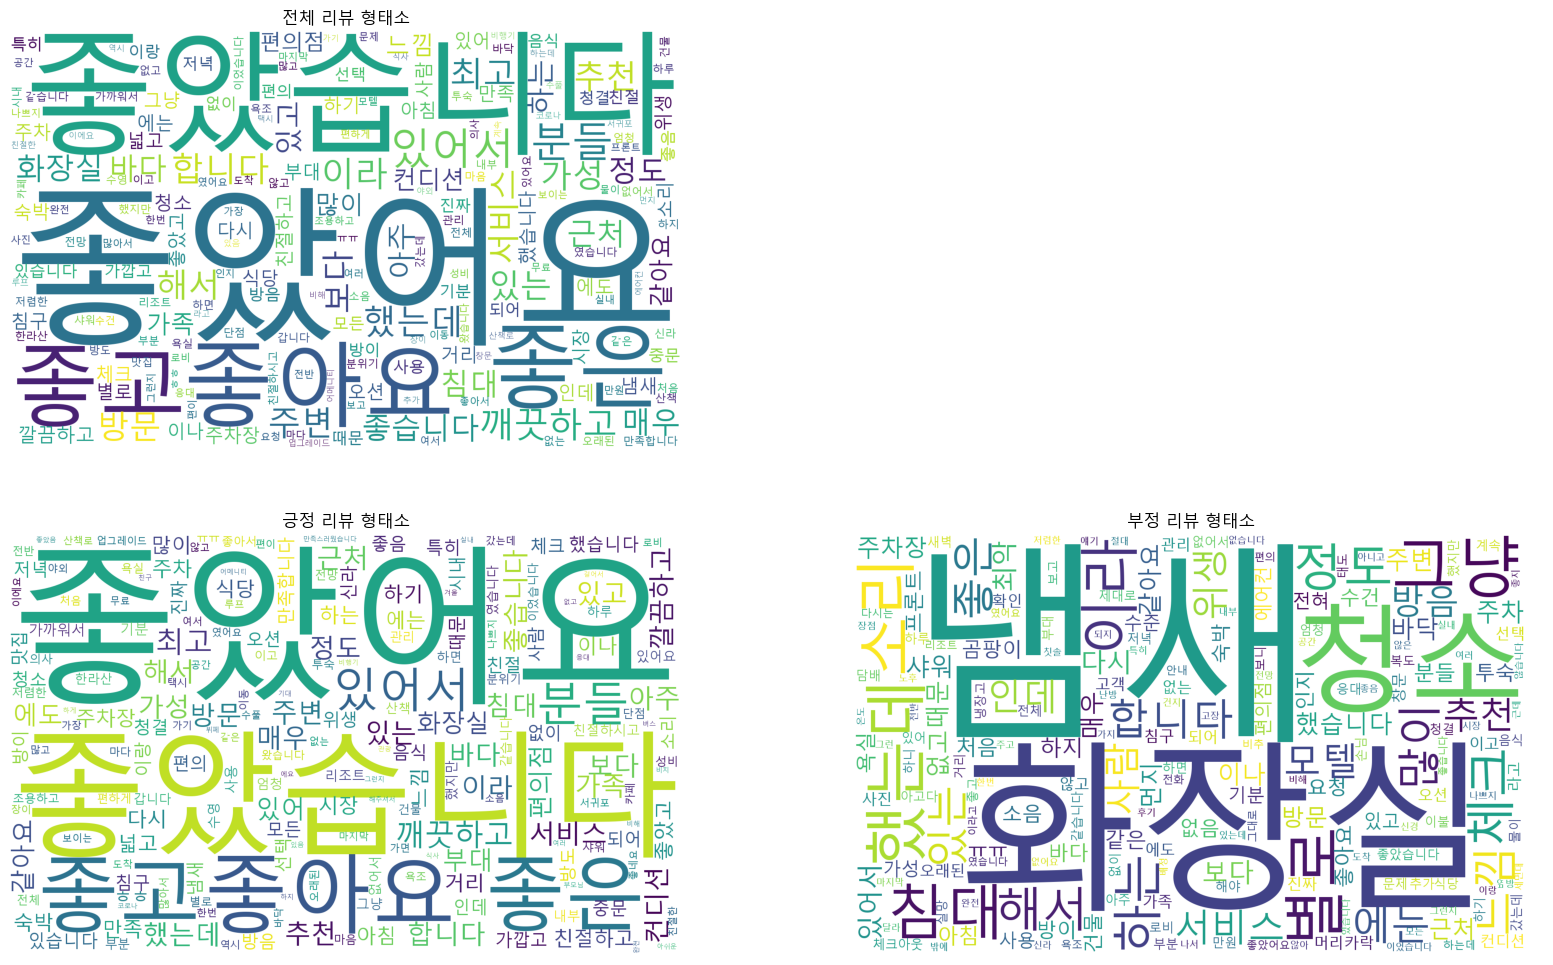

In [74]:
#불용문자 추가 형태소 워드클라우드
wc1=WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',width=800, height=500, scale=2.0, max_font_size=250, background_color='white')
wc2=WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',width=800, height=500, scale=2.0, max_font_size=250, background_color='white')
wc3=WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',width=800, height=500, scale=2.0, max_font_size=250, background_color='white')
gen_morphs_stop=wc1.generate_from_frequencies(morphs_final)
gen_morphs_pos_stop=wc2.generate_from_frequencies(morphs_final_pos)
gen_morphs_neg_stop=wc3.generate_from_frequencies(morphs_final_neg)
# plt.imshow(gen_morphs_stop)
fig, axs = plt.subplots(2,2, figsize=(20,12))
axs[1][0].imshow(gen_morphs_pos_stop)
axs[1][1].imshow(gen_morphs_neg_stop)
axs[0][0].imshow(gen_morphs_stop)
axs[1,0].set_title("긍정 리뷰 형태소")
axs[0,0].axis('off')
axs[1,1].set_title("부정 리뷰 형태소")
axs[0,1].axis('off')
axs[0,0].set_title("전체 리뷰 형태소")
axs[1,0].axis('off')
axs[1,1].axis('off')
plt.show()

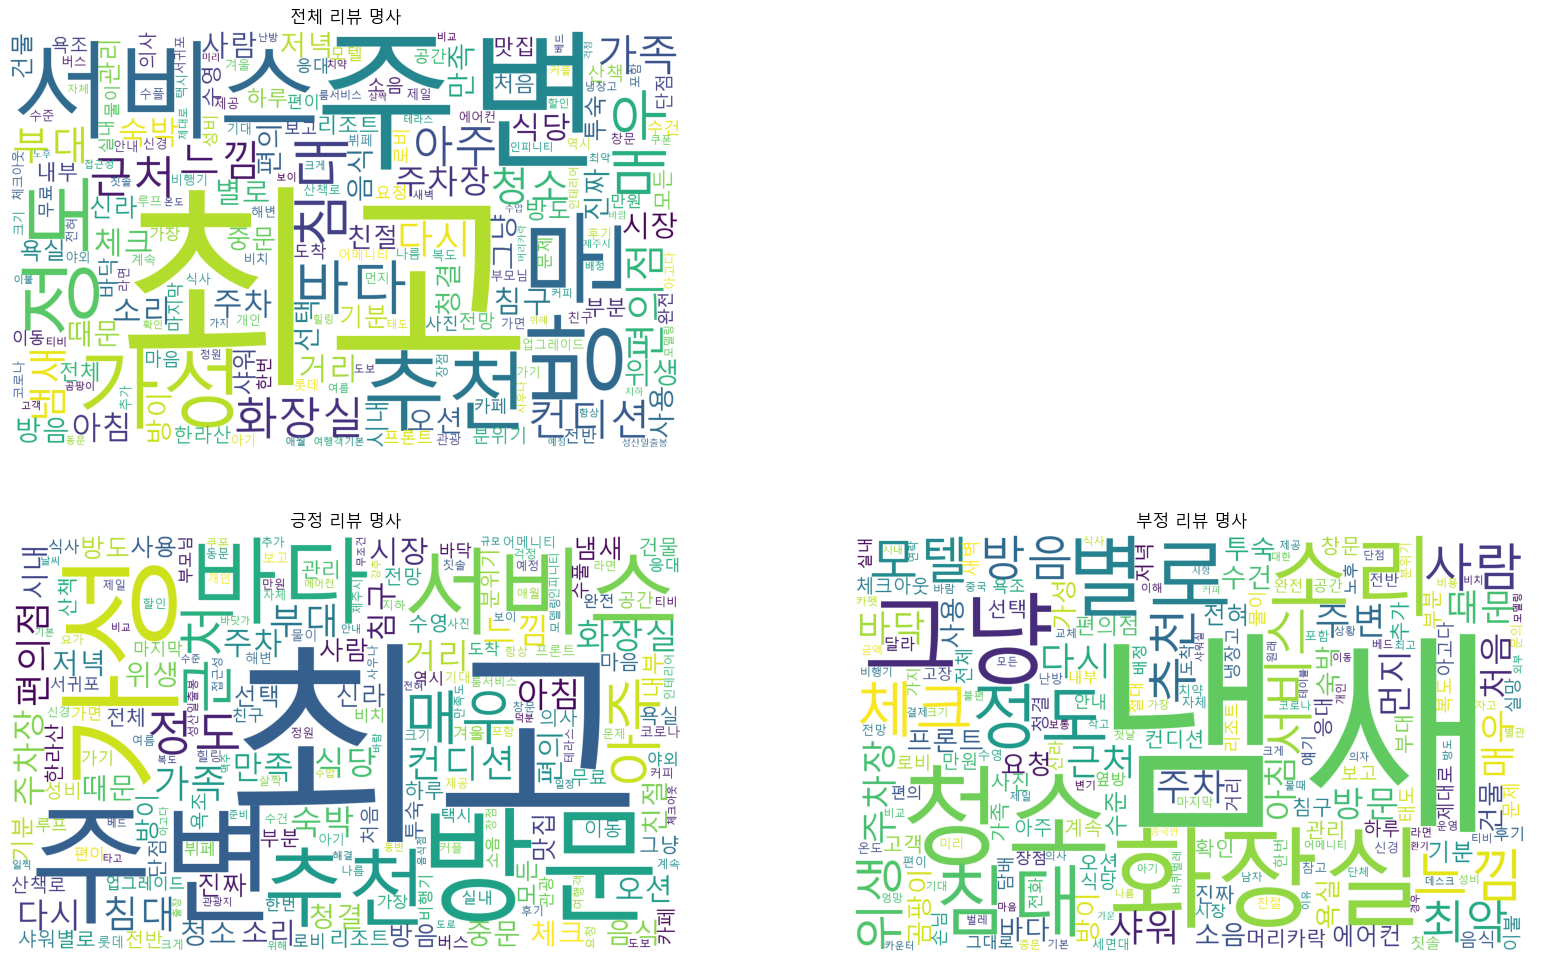

In [72]:
# 명사 불용문자 추가

wc4=WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',width=800, height=500, scale=2.0, max_font_size=250, background_color='white')
wc5=WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',width=800, height=500, scale=2.0, max_font_size=250, background_color='white')
wc6=WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',width=800, height=500, scale=2.0, max_font_size=250, background_color='white')

gen_nouns_stop=wc4.generate_from_frequencies(nouns_final)
gen_nouns_pos_stop=wc5.generate_from_frequencies(nouns_final_pos)
gen_nouns_neg_stop=wc6.generate_from_frequencies(nouns_final_neg)

fig, axs = plt.subplots(2,2, figsize=(20,12))
axs[1][0].imshow(gen_nouns_pos_stop)
axs[1][1].imshow(gen_nouns_neg_stop)
axs[0][0].imshow(gen_nouns_stop)
axs[1,0].set_title("긍정 리뷰 명사")
axs[0,0].axis('off')
axs[1,1].set_title("부정 리뷰 명사")
axs[0,1].axis('off')
axs[0,0].set_title("전체 리뷰 명사")
axs[1,0].axis('off')
axs[1,1].axis('off')
plt.show()

In [8]:
df3 =df[(df['Point']<9) & (df['Point']>=6)]
df3

,Grade,Hotel,Country,Year,Month,stay_day,member,Room type,Date,Review Title,Review Contents,Point
179,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2019,9,1,유아/아동 동반 가족 여행객,STANDARD TWIN - Breakfast,2019년 9월 | 1박,생각보다 괜찮았어요,"['공항근처 숙소는 원래 기대를 안했는데, 그래도 생각보다는 괜찮았어요 일단 위치가...",8.8
221,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2022,6,2,커플/2인 여행객,디럭스 트윈,2022년 6월 | 2박,직원분들 아주 친절해요.,['직원분들 친절하고 위치도 공항과 가까워서 좋습니다. 약간 방음이 안 좋은건 있지...,8.8
250,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2020,7,1,커플/2인 여행객,디럭스 트윈,2020년 7월 | 1박,나쁘지않았어요,['디럭스룸이 신관이라고 하여 디럭스룸으로 예약했는데 방은 넓직한편이고 침구류도 괜...,8.4
257,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2020,8,1,나홀로 여행객,디럭스 트윈,2020년 8월 | 1박,수영장 및 화장실 개선 필요,['위생 상태나 직원 태도 등이 만족스럽습니다. 정말 최고였습니다. 그러나 두 가지...,8.8
282,5,메종 글래드 제주 (Maison Glad Jeju),대한민국,2022,1,4,커플/2인 여행객,스탠다드 트윈,2022년 1월 | 4박,제주공항이랑 가까움,['설연휴에 다녀온 여행입니다 4박으로 묵었는데 3박은 렌트없이 도보나 대중교통을 ...,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
30568,1,골든 파크 호텔 제주 (Golden Park Hotel Jeju),대한민국,2019,8,1,나홀로 여행객,더블룸,2019년 8월 | 1박,적절한 숙소,['크게 장점은 없지만 단점도 없어서 좋아요'],7.6
30569,1,골든 파크 호텔 제주 (Golden Park Hotel Jeju),대한민국,2020,10,1,나홀로 여행객,객실정보없음,2020년 10월 | 1박,매우 좋음,['교통. 편리하고 저렴하나 옆방 소리가 틀림'],7.6
30570,1,골든 파크 호텔 제주 (Golden Park Hotel Jeju),대한민국,2021,1,1,나홀로 여행객,객실정보없음,2021년 1월 | 1박,가성비 좋음,['가성비 좋음 공항에서도 가까움'],7.6
30571,1,골든 파크 호텔 제주 (Golden Park Hotel Jeju),대한민국,2022,5,1,나홀로 여행객,더블 이코노미,2022년 5월 | 1박,하루 잠자는 용도로 좋아요,['하루 잠자는 용도로 좋아요'],6.0


In [2]:
#일부 평점 추출한거로 학습 후 전체 데이터에 평가
df3 =df[df['Point']<9 & (df['Point']>=6)]
X3 = df2['morphs3']
X5 = df3['morphs3']
y3 = df3['Point_index']
vectorizer_add = CountVectorizer(min_df=5,lowercase=False).fit(X3)
X3 = vectorizer_add.transform(X3)
X5 = vectorizer_add.transform(X5)

model_f = MultinomialNB()
#형태소 기준
model_f.fit(X3, y2)
pred_f = model_f.predict(X5)


print("전체 리뷰 평가")
print_clf_eval(y, pred_f)

NameError: name 'df' is not defined